### Band13とBand15の差分画像

差分を取ることで、火山灰や黄砂を判別しやすくなる。

使用するデータ：ひまわり8号netCDF形式ファイル  
[NICTサイエンスクラウド](https://sc-web.nict.go.jp/himawari/himawari-archive.html)より入手  
・2020年7月26日00UTCのデータ(Band13,15)

**ライブラリインポート**

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

**データ読み込み**

In [10]:
nc13 = Dataset('data/NC_H08_20200726_0000_B13_JP01_R20.nc', 'r')
nc15 = Dataset('data/NC_H08_20200726_0000_B15_JP01_R20.nc', 'r')

data13 = nc13.variables['tbb'][:]
lon13 = nc13.variables['longitude'][:]
lat13 = nc13.variables['latitude'][:]
nc13.close()
bt13 = data13[:,:]

data15 = nc15.variables['tbb'][:]
lon15 = nc15.variables['longitude'][:]
lat15 = nc15.variables['latitude'][:]
nc15.close()
bt15 = data15[:,:]

bt = bt15 - bt13

**シェープファイルの読み込み**

In [11]:
shp = 'data/kyushu/kyushu.shp'
shp_list = list(shpreader.Reader(shp).geometries())

**変数定義＆描画**

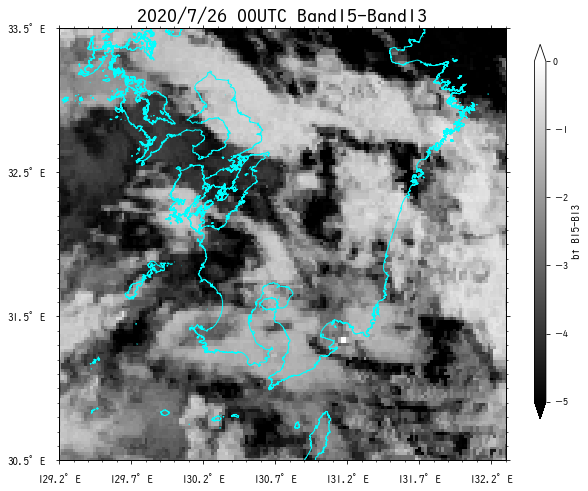

In [17]:
zmin, zmax = -5, 0

wlon, elon, slat, nlat = 129.2, 132.3, 30.5, 32.8
proj = ccrs.PlateCarree()

latfor = LatitudeFormatter()
lonfor = LongitudeFormatter()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=proj)

cmaps = plt.cm.get_cmap('gray')
CM = ax.imshow(bt, vmin=zmin, vmax=zmax, extent=(lon13[0], lon13[-1], lat13[-1], lat13[0]), cmap=cmaps, transform=proj)

nor = Normalize(vmin=zmin, vmax=zmax)

ax.set_extent([wlon, elon, slat, nlat], proj)
ax.xaxis.set_major_formatter(lonfor)
ax.yaxis.set_major_formatter(lonfor)

ax.add_geometries(shp_list, proj, facecolor='none', lw=1, edgecolor='#00ffff')

#---目盛りオプション追加---------------------------------
ax.set_xticks(np.arange(wlon, elon, 0.5), crs=proj)
ax.set_xticks(np.arange(wlon, elon, 0.1), minor=True, crs=proj)
ax.set_yticks(np.arange(slat, nlat+1,1), crs=proj)
ax.set_yticks(np.arange(slat, nlat, 0.1), minor=True, crs=proj)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(direction='out', which='major', pad=10, labelsize=11)
ax.set_title('2020/7/26 00UTC Band15-Band13', fontsize=20)

#---カラーバーの設定---------------------------------------
co = fig.add_axes([0.95, 0.2, 0.02, 0.65])

cbar = plt.colorbar(CM, co, ticks=np.arange(zmin, zmax+1,1), orientation='vertical', extend='both')
cbar.set_label('bt B15-B13', fontsize=11)

plt.show()